# Problem Definition

With this COVID-19 Dataset For Singapore from 2020 - 2022, we will be comparing two different models to see which model is a better predictor for COVID-19 Cases in Singapore.

We will be using 2 different models to compare between the dataset which are Polynomial Regression and ARIMA Model.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
sb.set()

In [2]:
# Original Covid 19 Dataset For Singapore 2020 - 2022
covidData = pd.read_csv('covid19_sg.csv')
covidData.head()

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO,Number taken booster shots,Perc population taken booster shots
0,2020-01-23,1,NaN,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,2,NaN,3,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,1,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,0,NaN,4,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,1,NaN,5,0,0,0,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Cleaned Covid 19 Dataset For Singapore (Chosen Variables)
CleancovidData = pd.DataFrame(covidData[["Date", "Daily Confirmed", "Daily Discharged", "Still Hospitalised", "Intensive Care Unit (ICU)", "In Isolation MOH report"]])
CleancovidData.head()

,Date,Daily Confirmed,Daily Discharged,Still Hospitalised,Intensive Care Unit (ICU),In Isolation MOH report
0,2020-01-23,1,0,1,0,NaN
1,2020-01-24,2,0,3,0,NaN
2,2020-01-25,1,0,4,0,NaN
3,2020-01-26,0,0,4,0,NaN
4,2020-01-27,1,0,5,0,NaN


In [4]:
# Finding the number of NULL vaues in each variables.
df = pd.DataFrame(CleancovidData)
df = df.drop(df.columns[0], axis = 1)

df.head()
df.isnull().sum()

Daily Confirmed               0
Daily Discharged              0
Still Hospitalised            0
Intensive Care Unit (ICU)     0
In Isolation MOH report      57
dtype: int64

In [5]:
# The Dataset for "Still Hospitalised" had some data that are negative numbers.
CleancovidData.head(323)

,Date,Daily Confirmed,Daily Discharged,Still Hospitalised,Intensive Care Unit (ICU),In Isolation MOH report
0,2020-01-23,1,0,1,0,NaN
1,2020-01-24,2,0,3,0,NaN
2,2020-01-25,1,0,4,0,NaN
3,2020-01-26,0,0,4,0,NaN
4,2020-01-27,1,0,5,0,NaN
...,...,...,...,...,...,...
318,2020-12-06,5,2,-3,0,44.0
319,2020-12-07,13,8,-2,0,48.0
320,2020-12-08,12,8,-7,0,57.0
321,2020-12-09,6,6,-10,0,60.0


In [6]:
# The Dataset for "Still Hospitalised" had some data that are negative numbers and replaced with zero instead.
numcovidData = CleancovidData._get_numeric_data()
numcovidData[numcovidData < 0] = 0
CleancovidData.head(323)

,Date,Daily Confirmed,Daily Discharged,Still Hospitalised,Intensive Care Unit (ICU),In Isolation MOH report
0,2020-01-23,1,0,1,0,NaN
1,2020-01-24,2,0,3,0,NaN
2,2020-01-25,1,0,4,0,NaN
3,2020-01-26,0,0,4,0,NaN
4,2020-01-27,1,0,5,0,NaN
...,...,...,...,...,...,...
318,2020-12-06,5,2,0,0,44.0
319,2020-12-07,13,8,0,0,48.0
320,2020-12-08,12,8,0,0,57.0
321,2020-12-09,6,6,0,0,60.0


In [7]:
# From the Dataset above, there was no data for "In Isolation MOH report" until 2020-03-20, the final dataset will start from 2020-03-20.
FinalcovidData = CleancovidData.iloc[57:]
FinalcovidData.head(266)

,Date,Daily Confirmed,Daily Discharged,Still Hospitalised,Intensive Care Unit (ICU),In Isolation MOH report
57,2020-03-20,40,7,254,16,0.0
58,2020-03-21,47,9,290,14,0.0
59,2020-03-22,23,4,309,14,0.0
60,2020-03-23,54,8,355,15,0.0
61,2020-03-24,49,3,401,17,0.0
...,...,...,...,...,...,...
318,2020-12-06,5,2,0,0,44.0
319,2020-12-07,13,8,0,0,48.0
320,2020-12-08,12,8,0,0,57.0
321,2020-12-09,6,6,0,0,60.0


In [8]:
# Resetting the index to plot boxplot, histplot and violinplot
CleanFinalcovidData = FinalcovidData.reset_index(drop = True)
CleanFinalcovidData.head(266)

,Date,Daily Confirmed,Daily Discharged,Still Hospitalised,Intensive Care Unit (ICU),In Isolation MOH report
0,2020-03-20,40,7,254,16,0.0
1,2020-03-21,47,9,290,14,0.0
2,2020-03-22,23,4,309,14,0.0
3,2020-03-23,54,8,355,15,0.0
4,2020-03-24,49,3,401,17,0.0
...,...,...,...,...,...,...
261,2020-12-06,5,2,0,0,44.0
262,2020-12-07,13,8,0,0,48.0
263,2020-12-08,12,8,0,0,57.0
264,2020-12-09,6,6,0,0,60.0


In [9]:
# As seen from the Data below, none of the values are NULL.
CleanFinalcovidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       660 non-null    object 
 1   Daily Confirmed            660 non-null    int64  
 2   Daily Discharged           660 non-null    int64  
 3   Still Hospitalised         660 non-null    int64  
 4   Intensive Care Unit (ICU)  660 non-null    int64  
 5   In Isolation MOH report    660 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 31.1+ KB


In [10]:
covidData_Variables = pd.DataFrame(CleanFinalcovidData[["Daily Confirmed", "Daily Discharged", "Still Hospitalised", "Intensive Care Unit (ICU)", "In Isolation MOH report"]])
covidData_Variables.head(266)

,Daily Confirmed,Daily Discharged,Still Hospitalised,Intensive Care Unit (ICU),In Isolation MOH report
0,40,7,254,16,0.0
1,47,9,290,14,0.0
2,23,4,309,14,0.0
3,54,8,355,15,0.0
4,49,3,401,17,0.0
...,...,...,...,...,...
261,5,2,0,0,44.0
262,13,8,0,0,48.0
263,12,8,0,0,57.0
264,6,6,0,0,60.0


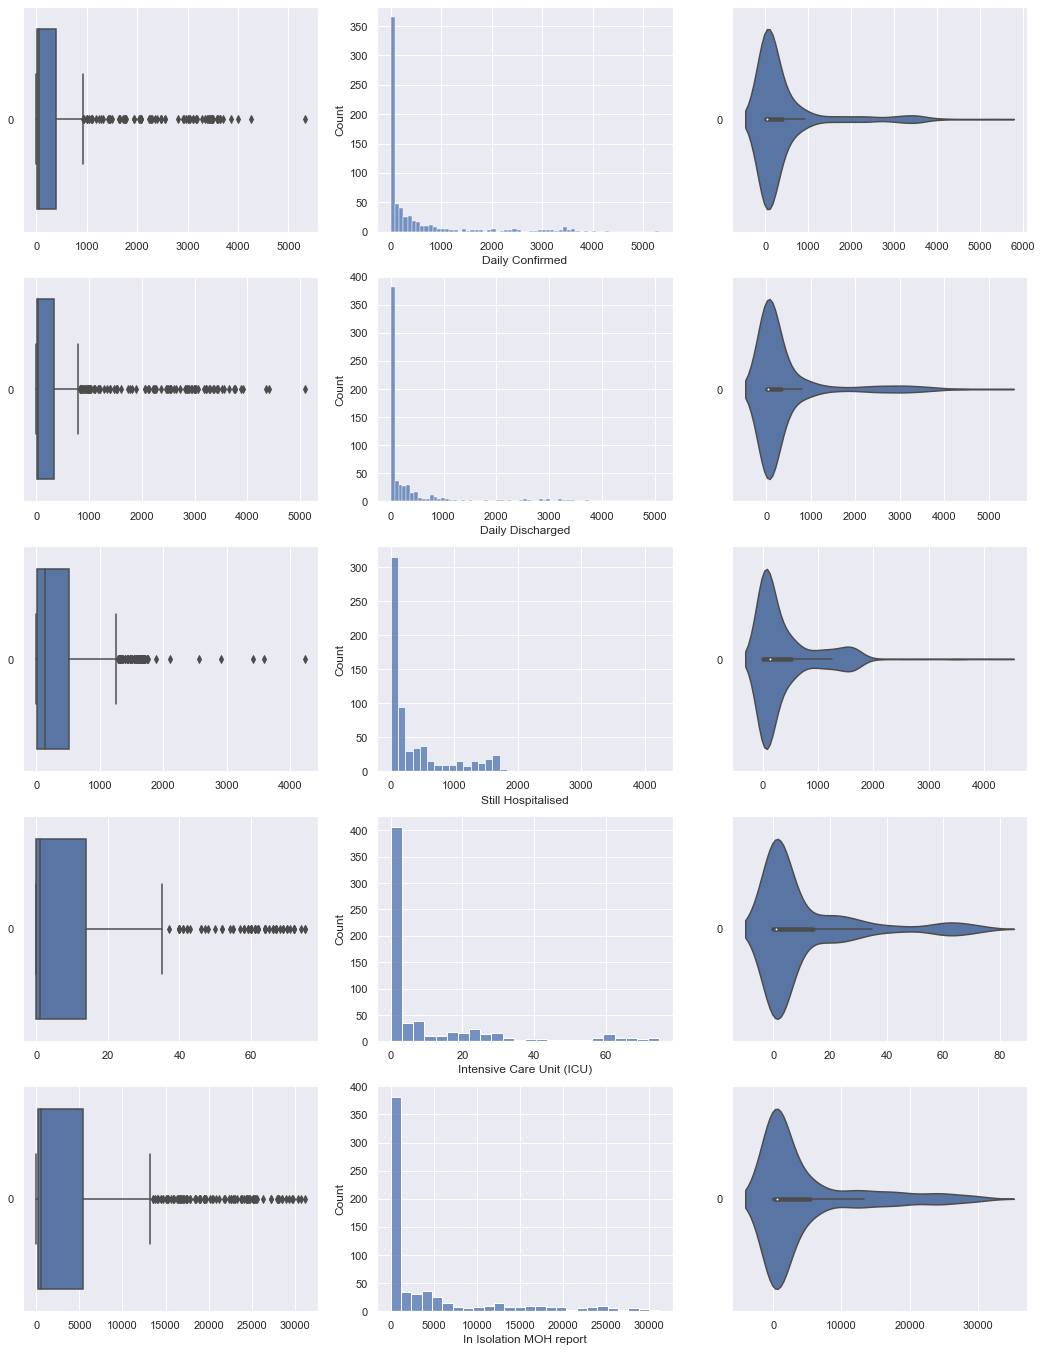

In [11]:
# Draw the distributions of four variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in covidData_Variables:
    sb.boxplot(data = covidData_Variables[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = covidData_Variables[var], ax = axes[count,1])
    sb.violinplot(data = covidData_Variables[var], orient = "h", ax = axes[count,2])
    count += 1

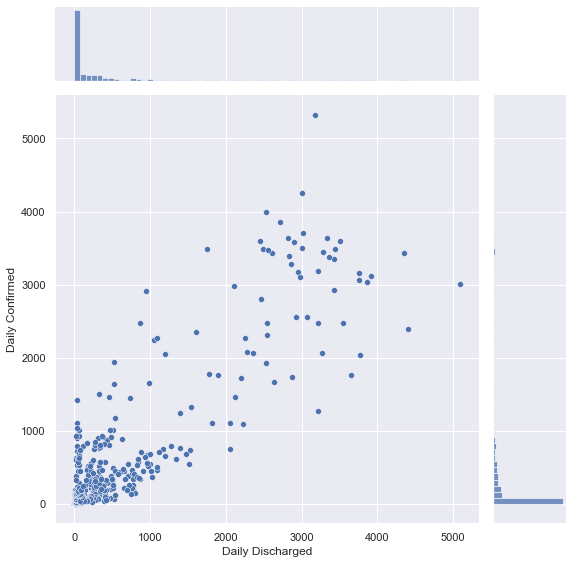

In [12]:
# Comparing the Correlation of Daily Confirmed against Daily Discharged.
sb.jointplot(data =  CleanFinalcovidData, x = "Daily Discharged", y = "Daily Confirmed", height = 8)

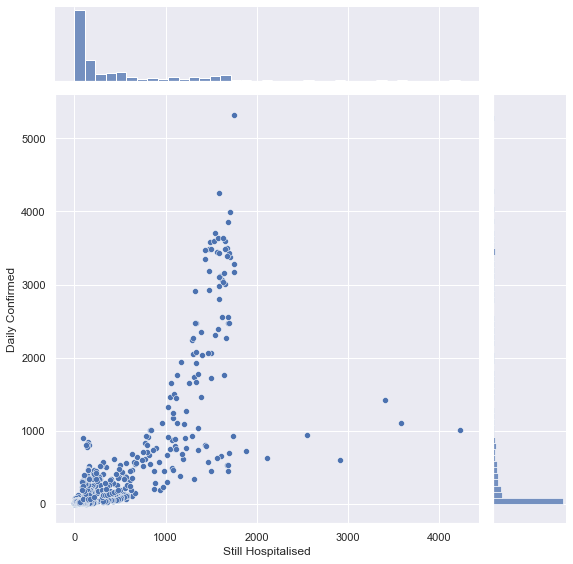

In [13]:
# Comparing the Correlation of Daily Confirmed against Still Hospitalised.
sb.jointplot(data =  CleanFinalcovidData, x = "Still Hospitalised", y = "Daily Confirmed", height = 8)

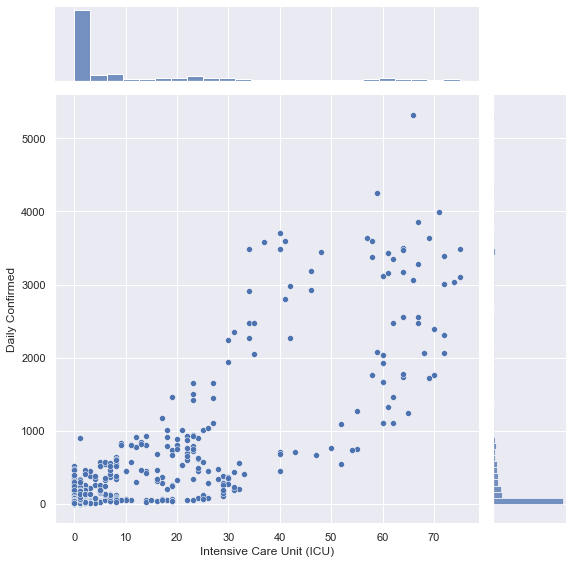

In [14]:
# Comparing the Correlation of Daily Confirmed against Intensive Care Unit (ICU).
sb.jointplot(data =  CleanFinalcovidData, x = "Intensive Care Unit (ICU)", y = "Daily Confirmed", height = 8)

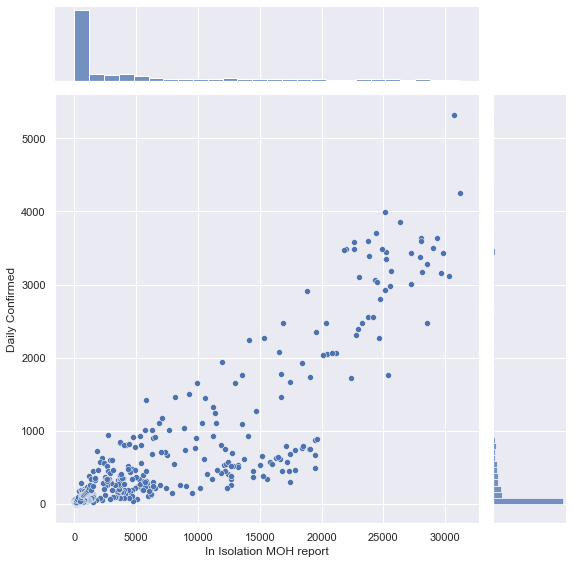

In [15]:
# Comparing the Correlation of Daily Confirmed against In Isolation MOH report.
sb.jointplot(data =  CleanFinalcovidData, x = "In Isolation MOH report", y = "Daily Confirmed", height = 8)

                           Daily Confirmed  Daily Discharged  \
Daily Confirmed                   1.000000          0.891533   
Daily Discharged                  0.891533          1.000000   
Still Hospitalised                0.765348          0.653446   
Intensive Care Unit (ICU)         0.847057          0.864210   
In Isolation MOH report           0.893365          0.881317   

                           Still Hospitalised  Intensive Care Unit (ICU)  \
Daily Confirmed                      0.765348                   0.847057   
Daily Discharged                     0.653446                   0.864210   
Still Hospitalised                   1.000000                   0.802853   
Intensive Care Unit (ICU)            0.802853                   1.000000   
In Isolation MOH report              0.760535                   0.801390   

                           In Isolation MOH report  
Daily Confirmed                           0.893365  
Daily Discharged                          0.881317  

<AxesSubplot:>

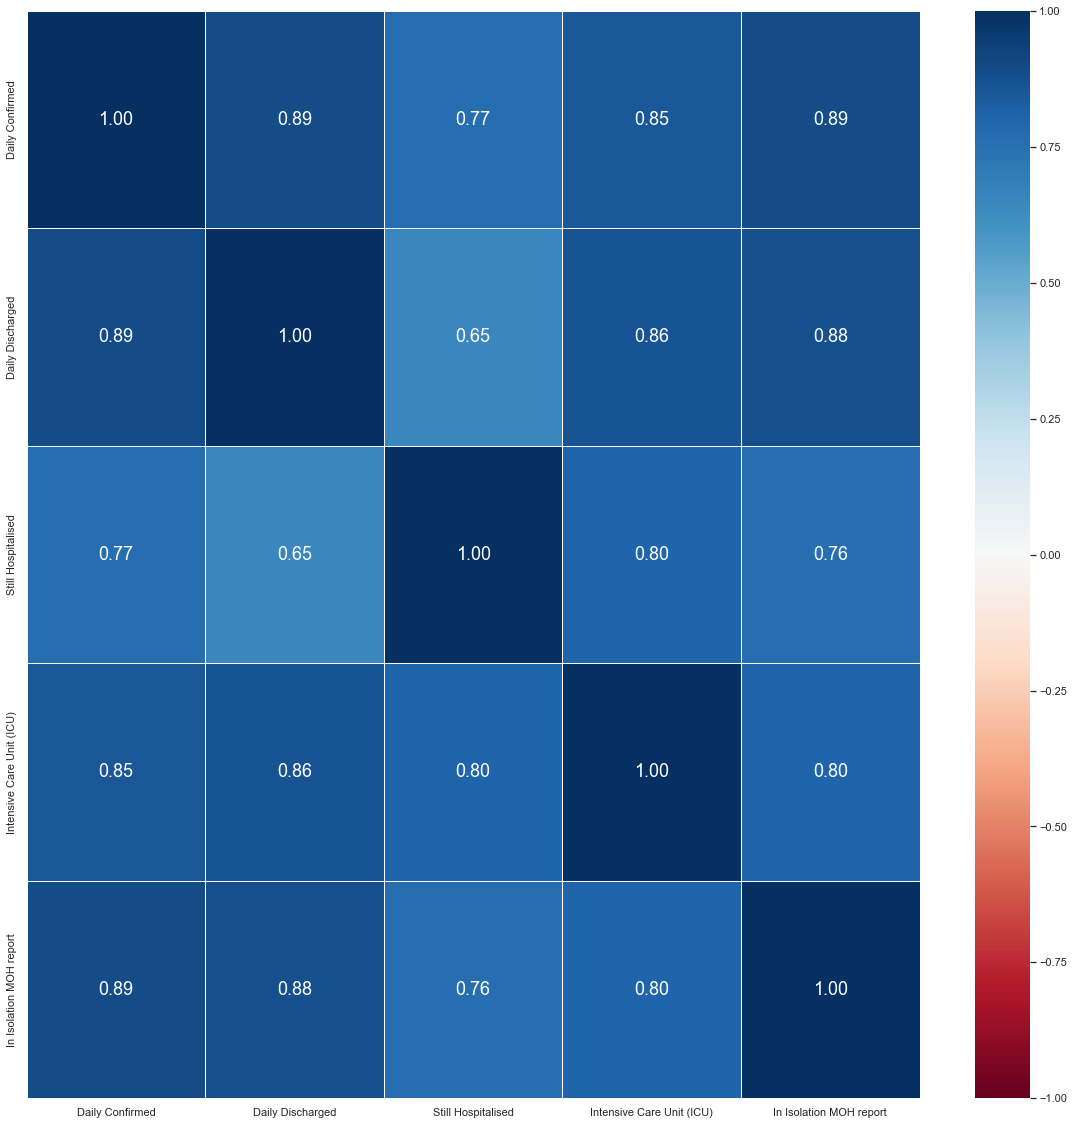

In [16]:
# Correlation Matrix
print(covidData_Variables.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(covidData_Variables.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Polynomial Regression (Method 1)

## Daily Confirmed Discharged vs Daily Discharged 

RMSE Train:  359.52361007409417
R2 Train:  0.8193763584351107


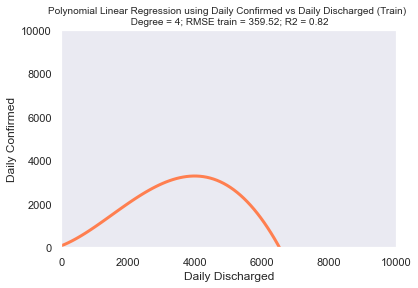

RMSE test:  381.1007908742172
R2 test:  0.8047945546445955


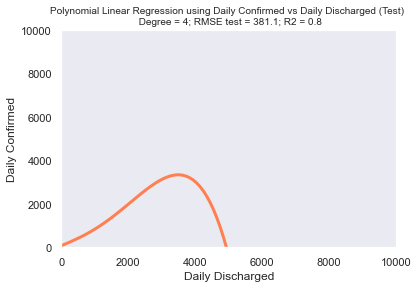

In [48]:
# Poloynomial Regression Comparision between Daily Discharged agaisnt Daily Confirmed
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import random


# Recall the Data set for Comparison
X = pd.DataFrame(CleanFinalcovidData['Daily Discharged']) # Predictor
Y = pd.DataFrame(CleanFinalcovidData['Daily Confirmed'])  # Response



# Split the Dataset into Train and Test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.20)



# Train cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_train1 = polynomial_features.fit_transform(X_train1)

model = LinearRegression()

model.fit(X_TRANSF_train1, y_train1)

Y_NEW_train1 = model.predict(X_TRANSF_train1)

rmse_train = np.sqrt(mean_squared_error(y_train1,Y_NEW_train1))
r2_train = r2_score(y_train1,Y_NEW_train1)

print('RMSE Train: ', rmse_train)
print('R2 Train: ', r2_train)

x_new_min1 = 0.0
x_new_max1 = 10000.0

X_NEW1 = np.linspace(x_new_min1, x_new_max1, 100)
X_NEW1 = X_NEW1[:,np.newaxis]

X_NEW_TRANSF1 = polynomial_features.fit_transform(X_NEW1)

Y_NEW1 = model.predict(X_NEW_TRANSF1)

plt.plot(X_NEW1, Y_NEW1, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min1,x_new_max1)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE train = {}; R2 = {}'.format(nb_degree, round(rmse_train,2), round(r2_train,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs Daily Discharged (Train) \n " + title,
          fontsize=10)
plt.xlabel('Daily Discharged')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()



# Test cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_test1 = polynomial_features.fit_transform(X_test1)

model = LinearRegression()

model.fit(X_TRANSF_test1, y_test1)

Y_NEW_test1 = model.predict(X_TRANSF_test1)

rmse_test = np.sqrt(mean_squared_error(y_test1,Y_NEW_test1))
r2_test = r2_score(y_test1,Y_NEW_test1)

print('RMSE test: ', rmse_test)
print('R2 test: ', r2_test)

x_new_min1 = 0.0
x_new_max1 = 10000.0

X_NEW1 = np.linspace(x_new_min1, x_new_max1, 100)
X_NEW1 = X_NEW1[:,np.newaxis]

X_NEW_TRANSF1 = polynomial_features.fit_transform(X_NEW1)

Y_NEW1 = model.predict(X_NEW_TRANSF1)

plt.plot(X_NEW1, Y_NEW1, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min1,x_new_max1)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE test = {}; R2 = {}'.format(nb_degree, round(rmse_test,2), round(r2_test,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs Daily Discharged (Test) \n " + title,
          fontsize=10)
plt.xlabel('Daily Discharged')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()

## Daily Confirmed Discharged vs Still Hospitalised

RMSE Train:  463.2891287879181
R2 Train:  0.7230809559061652


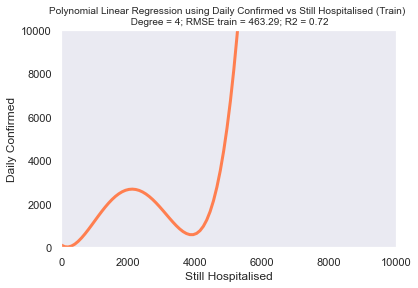

RMSE test:  350.9933383663136
R2 test:  0.7520736291759407


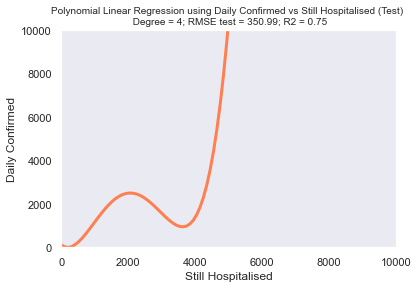

In [53]:
# Poloynomial Regression Comparision between Daily Confirmed agaisnt Still Hospitalised
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import random



# Recall the Data set for Comparison
X = pd.DataFrame(CleanFinalcovidData['Still Hospitalised']) # Predictor
Y = pd.DataFrame(CleanFinalcovidData['Daily Confirmed'])  # Response


# Split the Dataset into Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.20)



# Train cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_train2 = polynomial_features.fit_transform(X_train2)

model = LinearRegression()

model.fit(X_TRANSF_train2, y_train2)

Y_NEW_train2 = model.predict(X_TRANSF_train2)

rmse_train = np.sqrt(mean_squared_error(y_train2,Y_NEW_train2))
r2_train = r2_score(y_train2,Y_NEW_train2)

print('RMSE Train: ', rmse_train)
print('R2 Train: ', r2_train)

x_new_min2 = 0.0
x_new_max2 = 10000.0

X_NEW2 = np.linspace(x_new_min2, x_new_max2, 100)
X_NEW2 = X_NEW2[:,np.newaxis]

X_NEW_TRANSF2 = polynomial_features.fit_transform(X_NEW2)

Y_NEW2 = model.predict(X_NEW_TRANSF2)

plt.plot(X_NEW2, Y_NEW2, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min2,x_new_max2)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE train = {}; R2 = {}'.format(nb_degree, round(rmse_train,2), round(r2_train,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs Still Hospitalised (Train) \n " + title,
          fontsize=10)
plt.xlabel('Still Hospitalised')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()



# Test cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_test2 = polynomial_features.fit_transform(X_test2)

model = LinearRegression()

model.fit(X_TRANSF_test2, y_test2)

Y_NEW_test2 = model.predict(X_TRANSF_test2)

rmse_test = np.sqrt(mean_squared_error(y_test2,Y_NEW_test2))
r2_test = r2_score(y_test2,Y_NEW_test2)

print('RMSE test: ', rmse_test)
print('R2 test: ', r2_test)

x_new_min2 = 0.0
x_new_max2 = 10000.0

X_NEW2 = np.linspace(x_new_min2, x_new_max2, 100)
X_NEW2 = X_NEW2[:,np.newaxis]

X_NEW_TRANSF2 = polynomial_features.fit_transform(X_NEW2)

Y_NEW2 = model.predict(X_NEW_TRANSF2)

plt.plot(X_NEW2, Y_NEW2, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min2,x_new_max2)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE test = {}; R2 = {}'.format(nb_degree, round(rmse_test,2), round(r2_test,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs Still Hospitalised (Test) \n " + title,
          fontsize=10)
plt.xlabel('Still Hospitalised')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()

## Daily Confirmed Discharged vs Intensive Care Unit (ICU)

RMSE Train:  440.78825794785377
R2 Train:  0.7275206833475301


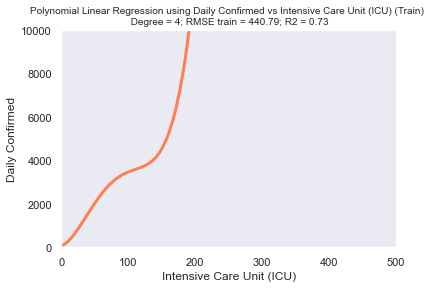

RMSE test:  450.7764376873881
R2 test:  0.7311192193840963


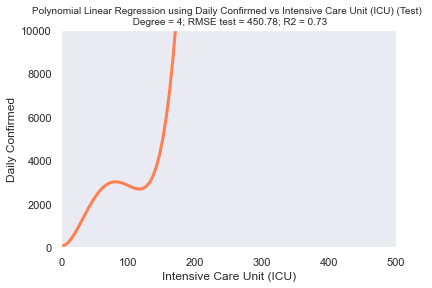

In [62]:
# Poloynomial Regression Comparision between Daily Confirmed agaisnt Intensive Care Unit (ICU)
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import random




# Recall the Data set for Comparison
X = pd.DataFrame(CleanFinalcovidData['Intensive Care Unit (ICU)']) # Predictor
Y = pd.DataFrame(CleanFinalcovidData['Daily Confirmed'])  # Response



# Split the Dataset into Train and Test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size = 0.20)



# Train cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_train3 = polynomial_features.fit_transform(X_train3)

model = LinearRegression()

model.fit(X_TRANSF_train3, y_train3)

Y_NEW_train3 = model.predict(X_TRANSF_train3)

rmse_train = np.sqrt(mean_squared_error(y_train3,Y_NEW_train3))
r2_train = r2_score(y_train3,Y_NEW_train3)

print('RMSE Train: ', rmse_train)
print('R2 Train: ', r2_train)

x_new_min3 = 0.0
x_new_max3 = 500.0

X_NEW3 = np.linspace(x_new_min3, x_new_max3, 100)
X_NEW3 = X_NEW3[:,np.newaxis]

X_NEW_TRANSF3 = polynomial_features.fit_transform(X_NEW3)

Y_NEW3 = model.predict(X_NEW_TRANSF3)

plt.plot(X_NEW3, Y_NEW3, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min3,x_new_max3)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE train = {}; R2 = {}'.format(nb_degree, round(rmse_train,2), round(r2_train,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs Intensive Care Unit (ICU) (Train) \n " + title,
          fontsize=10)
plt.xlabel('Intensive Care Unit (ICU)')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()



# Test cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_test3 = polynomial_features.fit_transform(X_test3)

model = LinearRegression()

model.fit(X_TRANSF_test3, y_test3)

Y_NEW_test3 = model.predict(X_TRANSF_test3)

rmse_test = np.sqrt(mean_squared_error(y_test3,Y_NEW_test3))
r2_test = r2_score(y_test3,Y_NEW_test3)

print('RMSE test: ', rmse_test)
print('R2 test: ', r2_test)

x_new_min3 = 0.0
x_new_max3 = 500.0

X_NEW3 = np.linspace(x_new_min3, x_new_max3, 100)
X_NEW3 = X_NEW3[:,np.newaxis]

X_NEW_TRANSF3 = polynomial_features.fit_transform(X_NEW3)

Y_NEW3 = model.predict(X_NEW_TRANSF3)

plt.plot(X_NEW3, Y_NEW3, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min3,x_new_max3)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE test = {}; R2 = {}'.format(nb_degree, round(rmse_test,2), round(r2_test,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs Intensive Care Unit (ICU) (Test) \n " + title,
          fontsize=10)
plt.xlabel('Intensive Care Unit (ICU)')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()

## Daily Confirmed Discharged vs In Isolation MOH report

RMSE Train:  303.9408081557942
R2 Train:  0.8597748902303781


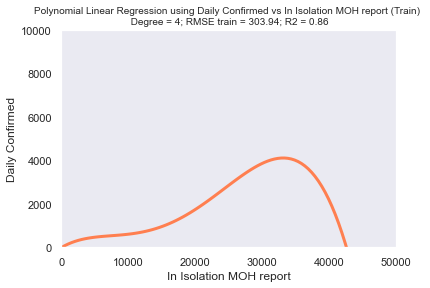

RMSE test:  299.11431190062564
R2 test:  0.907305509183432


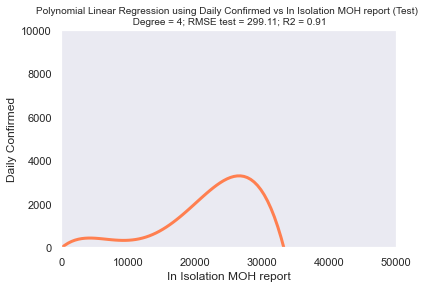

In [67]:
# Poloynomial Regression Comparision between Daily Confirmed agaisnt In Isolation MOH report
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import random



# Recall the Data set for Comparison
X = pd.DataFrame(CleanFinalcovidData['In Isolation MOH report']) # Predictor
Y = pd.DataFrame(CleanFinalcovidData['Daily Confirmed'])  # Response


# Split the Dataset into Train and Test
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, test_size = 0.20)



# Train cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_train4 = polynomial_features.fit_transform(X_train4)

model = LinearRegression()

model.fit(X_TRANSF_train4, y_train4)

Y_NEW_train4 = model.predict(X_TRANSF_train4)

rmse_train = np.sqrt(mean_squared_error(y_train4,Y_NEW_train4))
r2_train = r2_score(y_train4,Y_NEW_train4)

print('RMSE Train: ', rmse_train)
print('R2 Train: ', r2_train)

x_new_min4 = 0.0
x_new_max4 = 50000.0

X_NEW4 = np.linspace(x_new_min4, x_new_max4, 100)
X_NEW4 = X_NEW4[:,np.newaxis]

X_NEW_TRANSF4 = polynomial_features.fit_transform(X_NEW4)

Y_NEW4 = model.predict(X_NEW_TRANSF4)

plt.plot(X_NEW4, Y_NEW4, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min4,x_new_max4)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE train = {}; R2 = {}'.format(nb_degree, round(rmse_train,2), round(r2_train,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs In Isolation MOH report (Train) \n " + title,
          fontsize=10)
plt.xlabel('In Isolation MOH report')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()



# Test cases

nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF_test4 = polynomial_features.fit_transform(X_test4)

model = LinearRegression()

model.fit(X_TRANSF_test4, y_test4)

Y_NEW_test4 = model.predict(X_TRANSF_test4)

rmse_test = np.sqrt(mean_squared_error(y_test4,Y_NEW_test4))
r2_test = r2_score(y_test4,Y_NEW_test4)

print('RMSE test: ', rmse_test)
print('R2 test: ', r2_test)

x_new_min4 = 0.0
x_new_max4 = 50000.0

X_NEW4 = np.linspace(x_new_min4, x_new_max4, 100)
X_NEW4 = X_NEW4[:,np.newaxis]

X_NEW_TRANSF4 = polynomial_features.fit_transform(X_NEW4)

Y_NEW4 = model.predict(X_NEW_TRANSF4)

plt.plot(X_NEW4, Y_NEW4, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min4,x_new_max4)
plt.ylim(0,10000.0)

title = 'Degree = {}; RMSE test = {}; R2 = {}'.format(nb_degree, round(rmse_test,2), round(r2_test,2))

plt.title("Polynomial Linear Regression using Daily Confirmed vs In Isolation MOH report (Test) \n " + title,
          fontsize=10)
plt.xlabel('In Isolation MOH report')
plt.ylabel('Daily Confirmed')

plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()

In [21]:
CleanFinalcovidData = FinalcovidData.reset_index(drop = True)

def data_cleanup(CleanFinalcovidData):
    CleanFinalcovidData.sort_values('Date', inplace = True)
    CleanFinalcovidData.fillna(0, inplace = True)
    CleanFinalcovidData.loc[:, ['Date']] = pd.to_datetime(CleanFinalcovidData['Date'])
    CleanFinalcovidData.loc[:, ['Days From Start']] = CleanFinalcovidData['Date'] - CleanFinalcovidData.iloc[0]['Date']
    CleanFinalcovidData.loc[:, ['Days From Start']] = CleanFinalcovidData['Days From Start'].dt.days
    CleanFinalcovidData.set_index('Days From Start', inplace = True)


data_cleanup(CleanFinalcovidData)
CleanFinalcovidData.head(266)

,Date,Daily Confirmed,Daily Discharged,Still Hospitalised,Intensive Care Unit (ICU),In Isolation MOH report
Days From Start,,,,,,
0,2020-03-20,40,7,254,16,0.0
1,2020-03-21,47,9,290,14,0.0
2,2020-03-22,23,4,309,14,0.0
3,2020-03-23,54,8,355,15,0.0
4,2020-03-24,49,3,401,17,0.0
...,...,...,...,...,...,...
261,2020-12-06,5,2,0,0,44.0
262,2020-12-07,13,8,0,0,48.0
263,2020-12-08,12,8,0,0,57.0


In [22]:
# This function can be used to filter data for specific period of time

def filter_data(CleanFinalcovidData, start = None, end = None):
    filtered = CleanFinalcovidData.reset_index().sort_values('Date')
    if start: filtered = filtered[filtered['Date'] >= start]
    if end: filtered = filtered[filtered['Date'] < end]
    filtered.loc[:, 'Days From Start'] -= filtered.iloc[0]['Days From Start']
    filtered.set_index('Days From Start', inplace = True)
    return filtered

# ARIMA Model (Method 2)

The ARIMA model is a time series machine learning model for forecasting time series. It predicts future values by examining the differences between values in the time series. It consists of 3 components namely, Auto Regression (AR), Integrated (I) and Moving Average (MA), each of which is a parameter. The standard notation for these parameters are p, d and q. The combinations of the parameters indicate the type of ARIMA model used. 


Specifically:

1. p means the number of lag observations

2. d means the degree of difference

3. q means the order of the moving average


To build the ARIMA model, we will only use the 'Daily Confirmed' cases.

In [23]:
# This is the start and end date of the data that we will be using.

start_date = datetime(2020, 3, 20)
end_date = datetime(2022, 1, 8)

In [24]:
# Spliting of the dataset into Test and Train datasets. We will be splitting it into 80:20 (Train:Test).

date_split = 0.8 * (end_date - start_date) + start_date
train = filter_data(CleanFinalcovidData, start = start_date, end = date_split)
test = filter_data(CleanFinalcovidData, start = date_split, end = end_date)

In [25]:
dailyConfirmed_train = train['Daily Confirmed']

In [26]:
# We are using the param_sel() to help us with the selection.

def param_sel(CleanFinalcovidData):
    
    import itertools
    p = d = q = range(2)
    
    # Generating all the different combinations of p, d and q
    pdq = list(itertools.product(p, d, q))
    aic = {}
    
    for param in pdq:
        try:
            mod = ARIMA(dailyConfirmed_train, order = param)
            res = mod.fit()
            print(f"ARIMA{param} - AIC = {res.aic}")
            aic[res.aic] = param
        except:
            continue

    optimal = aic[min(aic)]
    print(f"The optimal parameters: {optimal}")
    
    return optimal

In [27]:
param = param_sel(dailyConfirmed_train)

ARIMA(0, 0, 0) - AIC = 7157.289398452884
ARIMA(0, 0, 1) - AIC = 6804.505590192837
ARIMA(0, 1, 0) - AIC = 6255.225159734286
ARIMA(0, 1, 1) - AIC = 6085.009895156592
ARIMA(1, 0, 0) - AIC = 6246.807789132088
ARIMA(1, 0, 1) - AIC = 6097.273664832235
ARIMA(1, 1, 0) - AIC = 6077.882532170689
ARIMA(1, 1, 1) - AIC = 6067.450181628665
The optimal parameters: (1, 1, 1)


# Training The Model Based on Train data

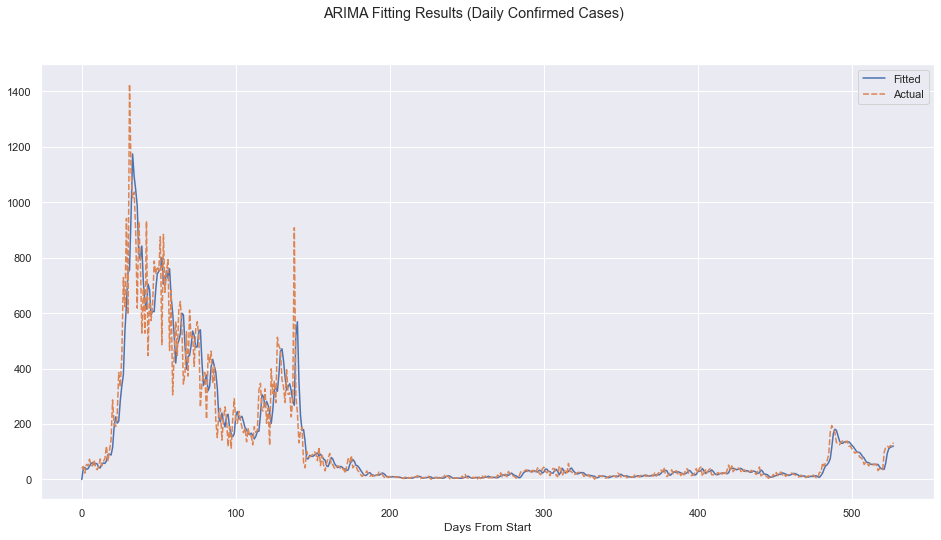

In [28]:
# Using the optimal parameters to do the fitting together with the machine learning library available

model = ARIMA(dailyConfirmed_train, order = param)
ARIMA_res = model.fit()
ARIMA_res_y = pd.DataFrame({"Fitted": ARIMA_res.fittedvalues, "Actual": dailyConfirmed_train})

fig = plt.figure(figsize = (16, 8))
plt.suptitle(f"ARIMA Fitting Results (Daily Confirmed Cases)")
sb.lineplot(data = ARIMA_res_y)
plt.show()

# Predicting Test Data

In [29]:
dailyConfirmed_test = test['Daily Confirmed']

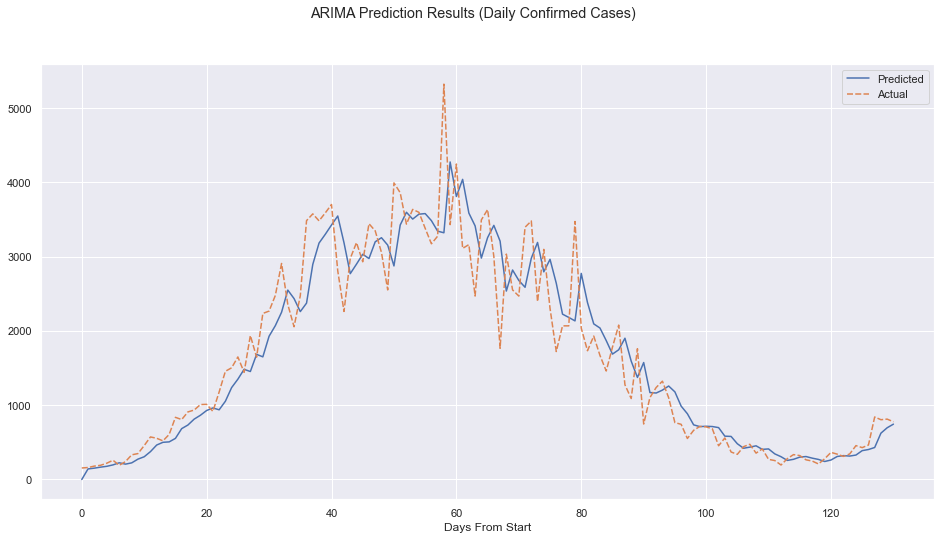

In [30]:
# Predicting the test data with ARIMA model

model = ARIMA(dailyConfirmed_test, order = param)
ARIMA_pred = model.fit()
ARIMA_prediction = pd.DataFrame({"Predicted": ARIMA_pred.fittedvalues, "Actual": dailyConfirmed_test})

fig = plt.figure(figsize = (16, 8))
plt.suptitle(f"ARIMA Prediction Results (Daily Confirmed Cases)")
sb.lineplot(data = ARIMA_prediction)
plt.show()

In [31]:
# This function is to calculate the Root Mean Square Error

def RMSE(predicted, actual):
    MSE = np.mean((predicted - actual) ** 2)
    RMSE = np.sqrt(MSE)
    return RMSE

In [32]:
# Calculating the Root Mean Square Error of the result from ARIMA model

ARIMA_RMSE = RMSE(ARIMA_prediction['Predicted'], ARIMA_prediction['Actual'])
ARIMA_RMSE

448.1372834658833

# Conclusion

From the 2 models that were chosen, which were Polynomial Regression and ARIMA Model, since ARIMA Model is only able to use  1 variable which is the daily confirmed variable with respect to time, Polynomial Regression which is able to compare Daily Confirmed with the other 4 factors was determined to be the better one. Also to add on, the RMSE value calculated for the ARIMA model was larger than RMSE calculated from the variables for In Isolation MOH report and Daily Discharged using Polynomial Regression. However, the other two variables which have a lower correlation with Daily Cases found in the EDA, were seen to generated a higher RMSE value than the RMSE from ARIMA Model. Therefor, Polynomial Regression will only be better against ARIMA model if the variable used to predict the Daily Cases have a high correlation in the first place. As such, only variable such as the In Isolation MOH Report and Daily Discharged were seen to have the highest correlation with Daily Cases and therefor were able to generate a lower RMSE value as compared to the RMSE Value generated from ARIMA model.

By comparing between the 4 different factors that were used in the comparison in the Polynomial Regression, based on their R^2, we have determined the effectiveness of their model as such: 

Most effective to least effective: Based which ones had the average highest R^2 based on the train and test models

1. In Isolation MOH report
2. Daily Discharged
3. Intensive Care Unit (ICU)
4. Still Hospitalised




# Reference

DataSet: https://www.kaggle.com/datasets/shivamb/covid19-in-singapore-latest-detailed-data

Polynomial Regression: 

- ND, 4/2/2019 . How to implement a polynomial linear regression using scikit-learn and python 3 ?
 https://moonbooks.org/Articles/How-to-implement-a-polynomial-linear-regression-using-scikit-learn-and-python-3-/




ARIMA Model: 

- Vincent, T. 2017. A Guide to Time Series Forecasting with ARIMA in Python 3. 
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3


- Nau, R. 2020. Introduction to ARIMA: nonseasonal models. 
https://people.duke.edu/~rnau/411arim.htm